In [22]:
import pydot
from IPython.display import Image, display


tree2 = ['Query',
   [
       'cust_inv', ['cust', 'inv'],
       'trk_s', ['trk'],
   ]
  ]

def parse_tree(node_list):
    """Parses a nested list into a networkx tree."""
    tree = pydot.Dot(graph_type='digraph',fontsize="30", color="red",
                                                    fontcolor="blue",  style="filled", fillcolor="black")
    root = node_list[0]
    tree.add_node(pydot.Node(root, style="filled", fillcolor="yellow", shape="cylinder"))

    queue = [(root, node_list[1])]

    while queue:
        parent, nodes = queue.pop(0)
        prev = None
        for node in nodes:
            if isinstance(node, list):
                queue.append((prev, node))
            else:
                if node == 'LoanTrancheSummary':
                    tree.add_node(pydot.Node(node, style="filled", fillcolor="green", shape='note'))
                else:    
                    tree.add_node(pydot.Node(node, style="filled", fillcolor="orange", shape='note'))
                edge = pydot.Edge(pydot.Node(parent, style="filled", fillcolor="orange"), pydot.Node(node, style="filled", fillcolor="orange"))
                tree.add_edge(edge)

            prev = node

    return tree


In [23]:
tree3 = ['<query>', 
             ['HouseholdMetrics', 
                  ['HouseholdLoanSummary', ['LoanMetrics','HouseholdLoanDates','HouseholdOriginations'],
                   'HouseholdOriginations',
                   'HouseholdDepositSummary', ['HouseholdOriginations'],
                      'HouseholdWealthSummary', ['WealthMetrics','HouseholdOriginations'],
                   'HouseholdCustomerSummary',
                       ['CustomerMetrics', 
                        ['CustomerLoanSummary',  ['LoanMetrics'],
                         'CustomerDepositSummary',
                         'CustomerWealthSummary', ['WealthMetrics', ['WealthCustodianCustomerSummary']],
                         'CustomerHouseholdSummary',
                             ['HouseholdMaxCustomer', 
                              ['CustomerOriginations',
                               'CustomerLoanSummary',
                               'CustomerDepositSummary'],
                              'CustomerDepositSummary',
                              'CustomerLoanSummary', ['LoanMetrics',['LoanTrancheSummary'],],
                              'CustomerOriginations'],
                     'CustomerOriginations'],
                        'CustomerLoanSummary',
                        'CustomerHouseholdSummary']]
             ]
        ]
                  

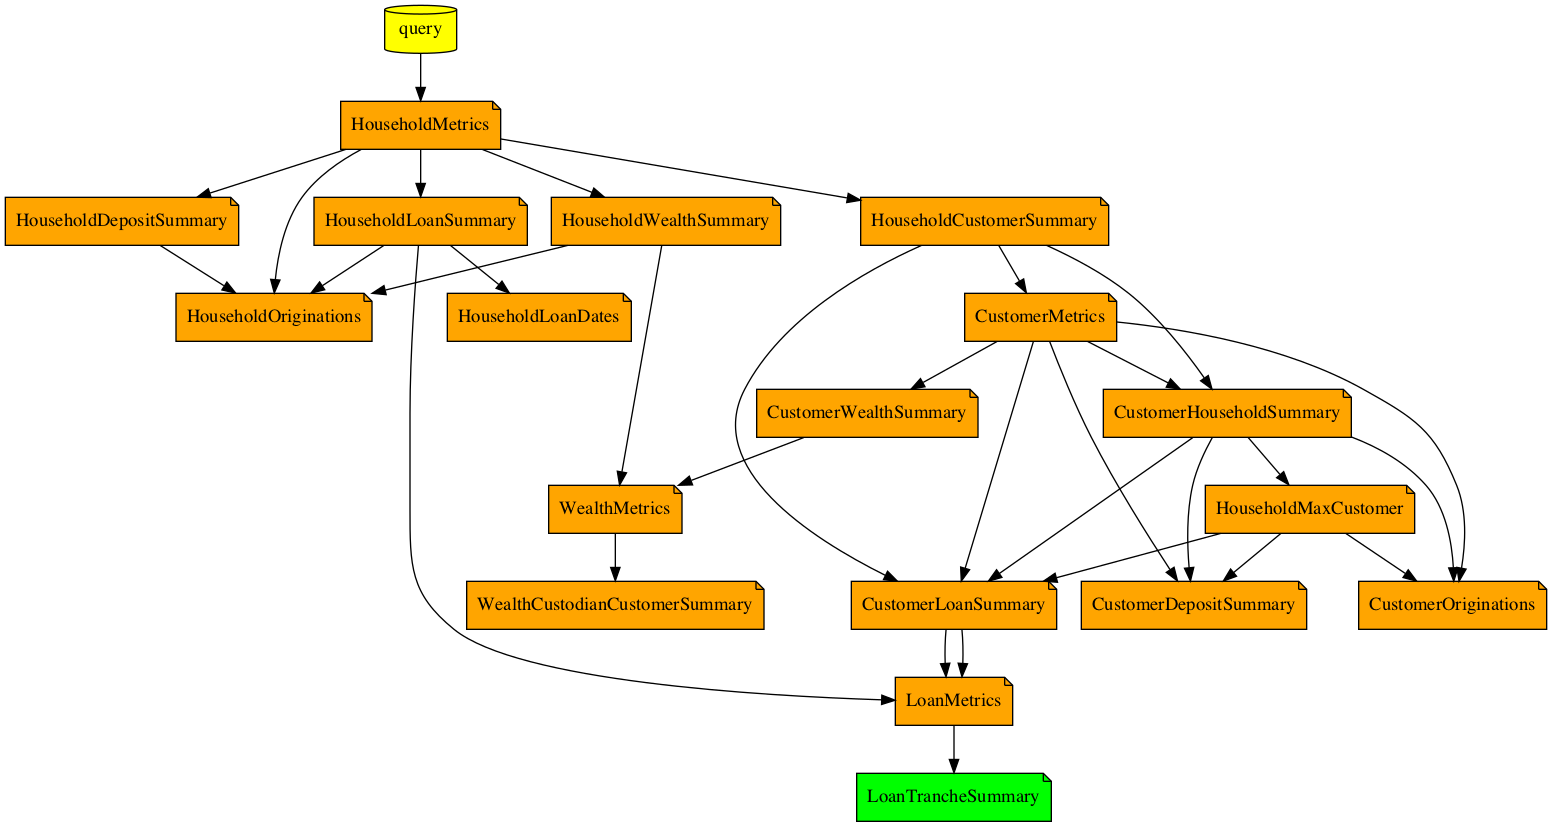

In [24]:
# write to a dot file
G = parse_tree(tree3)

im = Image(G.create_png())
display(im)